In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Housing.csv")
x_train = dataset.iloc[:400, 1].values
y_train = dataset.iloc[:400, 0].values
x_train = x_train / max(x_train)
y_train = y_train / max(y_train)

#x_train = np.array([1, 2])
#y_train = np.array([300, 500])

In [3]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost += (f_wb - y[i]) ** 2

    return (1 / (2 * m)) * cost

In [4]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    return dj_dw / m, dj_db / m

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient):
    # J_history (list): History of cost values
    # p_history (list): History of parameters
    
    j_history = []
    p_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w_i = w - alpha*dj_dw
        b_i = b - alpha*dj_db
        w = w_i
        b = b_i
        
        if i < 10000:
            j_history.append(compute_cost(x, y, w, b))
            p_history.append([w, b])
    return w, b, j_history, p_history

In [6]:
w = 0
b = 0
alpha =  1e-14
num_iter = 10000

w, b, j_history, p_history = gradient_descent(x_train, y_train, w, b, alpha, num_iter, compute_cost, compute_gradient)
print(w, b)

1.4982716211013542e-11 4.096005526085075e-11


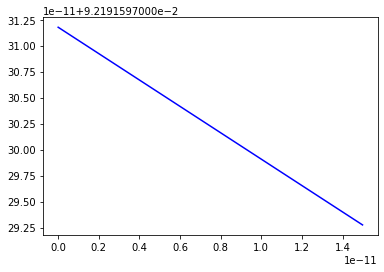

In [7]:
plt.plot([i[0] for i in p_history], j_history, c="b")
plt.show()

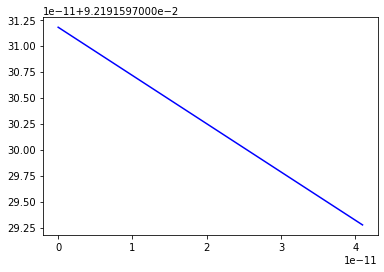

In [13]:
plt.plot([i[1] for i in p_history], j_history, c="b")
plt.show()

In [14]:
def compute_train_model(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w*x[i] + b
    return f_wb

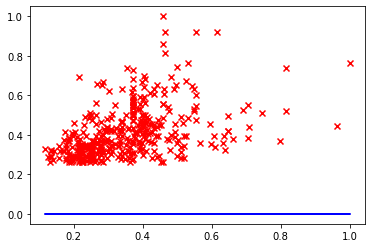

In [15]:
temp_f_wb = compute_train_model(x_train, w, b)
plt.plot(x_train, temp_f_wb, c="b")
plt.scatter(x_train, y_train, c="r", marker="x")
plt.show()

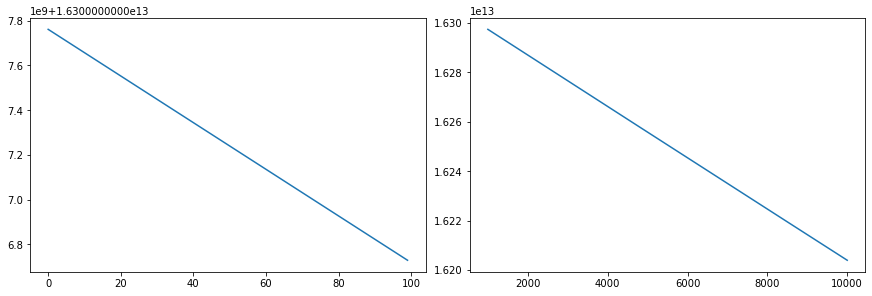

In [15]:
# COST vs Iterations (Start)

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_history[:100])
ax2.plot(1000 + np.arange(len(j_history[1000:])), j_history[1000:])
plt.show()